In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
scor = pd.read_csv("credit_card_default_analysis.csv") 
scor.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [100]:
scor.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [101]:
limit_vernul = scor[scor.default == 0].LIMIT_BAL.values
limit_nevernul = scor[scor.default == 1].LIMIT_BAL.values

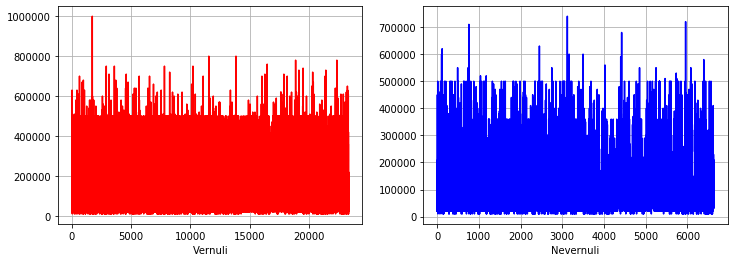

In [102]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.plot(limit_vernul, color = 'r')
pylab.xlabel('Vernuli')

pylab.subplot(1,2,2)
pylab.grid()
pylab.plot(limit_nevernul, color = 'b')
pylab.xlabel('Nevernuli')

pylab.show()

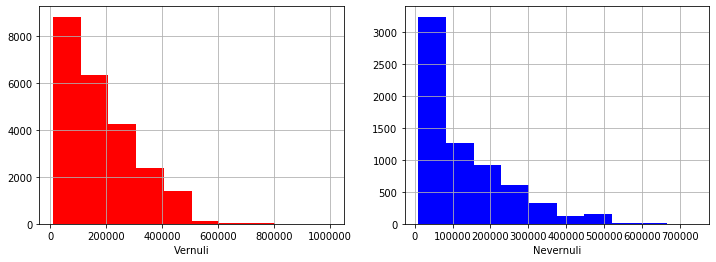

In [103]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(limit_vernul, color = 'r')
pylab.xlabel('Vernuli')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(limit_nevernul, color = 'b')
pylab.xlabel('Nevernuli')

pylab.show()

Из гистограмм можно предположить, что чаще всего берут кредиты с небольшим лимитом. Людей вернувших кредиты в среднем больше, чем невернувших. Также необходимо заметить, что в обеих выборках распределение предположительно не является нормальным. Проверим это по кк - графикам

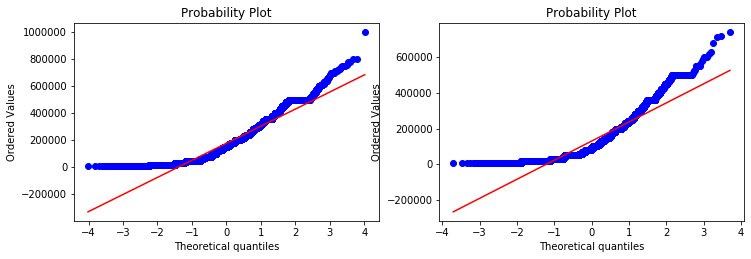

In [104]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(limit_vernul, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(limit_nevernul, dist="norm", plot=pylab)
pylab.show()

действительно, графики показывают, что распределения не яляются нормальными. воспользуемся методом бутстрепа для решения первой задачи.

In [105]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
vernul_median_scores = list(map(np.median, get_bootstrap_samples(limit_vernul, 1000)))
nevernul_median_scores = list(map(np.median, get_bootstrap_samples(limit_nevernul, 1000)))

print("95% confidence interval for the vernul median :",  stat_intervals(vernul_median_scores, 0.05))
print("95% confidence interval for the nevernul median :",  stat_intervals(nevernul_median_scores, 0.05))

95% confidence interval for the vernul median : [150000. 150000.]
95% confidence interval for the nevernul median : [80000. 90000.]


исходя из полученных интервалов, можем полностью отвергнуть гипотезу о том, что медианные значения кредитного лимита для обеих групп равны (интервалы не пресекаются и один лежит полностью левее другого)

т.к. выборки не являются зависимыми, то применим непараметрический критерий манна-уитни для проверки гипотезы о равенстве средних

In [106]:
stats.mannwhitneyu(limit_vernul, limit_nevernul)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

видим, что pvalue очень маленькое по отношению к 0.05 , а значит мы отвергаем гипотезу о равенстве средних. C практческой точки зрения результаты являются значимыми, т.к. отличие  в медианах говорит нам о том ближе к какой категории риска с большей вероятностью находится тот или иной кредитный лимит

In [107]:
sex_vernul = scor[scor.default == 0].SEX.values
sex_nevernul = scor[scor.default == 1].SEX.values

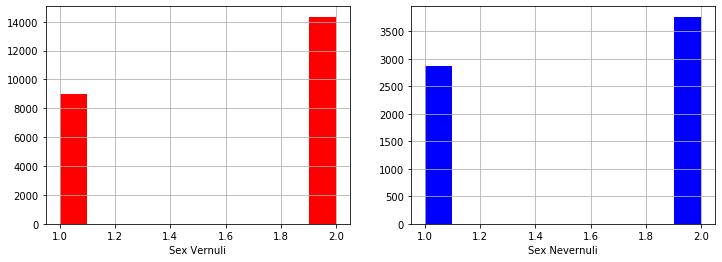

In [108]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(sex_vernul, color = 'r')
pylab.xlabel('Sex Vernuli')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(sex_nevernul, color = 'b')
pylab.xlabel('Sex Nevernuli')

pylab.show()

In [109]:
sex_vernul=sex_vernul -1
sex_nevernul=sex_nevernul-1

из графиков видно, что распределение для обеих выборок является биномиальным

In [110]:
from statsmodels.stats.proportion import proportion_confint

conf_interval_sex_vernuli = proportion_confint(sum(sex_vernul), 
                                            sex_vernul.shape[0],
                                            method = 'wilson')
conf_interval_sex_nevernuli = proportion_confint(sum(sex_nevernul), 
                                           sex_nevernul.shape[0],
                                            method = 'wilson')

In [111]:
print('95%% confidence interval for a click probability: [%f, %f]' % conf_interval_sex_vernuli)
print('95%% confidence interval for a click probability [%f, %f]' % conf_interval_sex_nevernuli)

95% confidence interval for a click probability: [0.607890, 0.620373]
95% confidence interval for a click probability [0.555102, 0.578938]


согласно интервальной оценке видно, что гендерный состав группы людей вернувших и не вернувших кредит отличается. (интервалы не пересекаются)

проверим z-критерий

In [112]:

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = sc.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sc.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sc.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sc.stats.norm.cdf(z_stat)

In [113]:
proportions_diff_z_test(proportions_diff_z_stat_ind(sex_vernul, sex_nevernul))

4.472866521609831e-12

видим, что проверяя двустороннюю гипотезу, мы получаем p_value гораздо меньшего порядка, чем 0.05 тем самым отвергаем гипотезу о том, что гендерный состав в выборках не отличается. 

далее проверим гипотезу о том, что образование не влияет на то, вернет ли человек долг

построим для каждой группы образования доверительный интервал для доли (Уилсона) 

In [114]:
edu_vernuli = scor[scor.default == 0].EDUCATION.values
edu_nevernuli = scor[scor.default == 1].EDUCATION.values

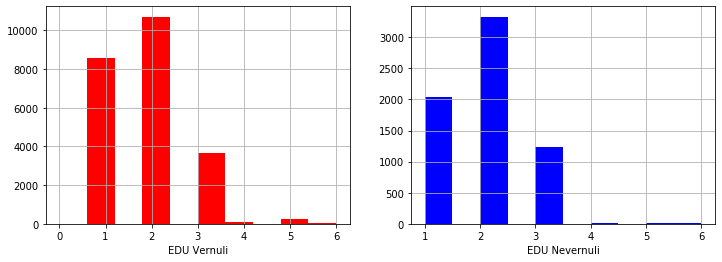

In [115]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(edu_vernuli, color = 'r')
pylab.xlabel('EDU Vernuli')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(edu_nevernuli, color = 'b')
pylab.xlabel('EDU Nevernuli')

pylab.show()

In [116]:
doctor = scor[scor.EDUCATION == 0].default.values
magistr = scor[scor.EDUCATION == 1].default.values
bakalavr = scor[scor.EDUCATION == 2].default.values
vipusknik = scor[scor.EDUCATION == 3].default.values
nachalnoe = scor[scor.EDUCATION == 4].default.values
prochee = scor[scor.EDUCATION == 5].default.values
netdannix = scor[scor.EDUCATION == 6].default.values

In [117]:
conf_interval_doctor = proportion_confint(sum(doctor), 
                                            doctor.shape[0],
                                            method = 'wilson')
conf_interval_magistr = proportion_confint(sum(magistr), 
                                            magistr.shape[0],
                                            method = 'wilson')
conf_interval_bakalavr = proportion_confint(sum(bakalavr), 
                                            bakalavr.shape[0],
                                            method = 'wilson')
conf_interval_vipusknik = proportion_confint(sum(vipusknik), 
                                            vipusknik.shape[0],
                                            method = 'wilson')
conf_interval_nachalnoe = proportion_confint(sum(nachalnoe), 
                                            nachalnoe.shape[0],
                                            method = 'wilson')
conf_interval_prochee = proportion_confint(sum(prochee), 
                                            prochee.shape[0],
                                            method = 'wilson')
conf_interval_netdannix = proportion_confint(sum(netdannix), 
                                            netdannix.shape[0],
                                            method = 'wilson')

In [118]:
print('95%% confidence interval for a click probability, doctor: [%f, %f]' % conf_interval_doctor)
print('95%% confidence interval for a click probability, magistr [%f, %f]' % conf_interval_magistr)
print('95%% confidence interval for a click probability, bakalavr [%f, %f]' % conf_interval_bakalavr)
print('95%% confidence interval for a click probability, vipusknik [%f, %f]' % conf_interval_vipusknik)
print('95%% confidence interval for a click probability, nachalnoe [%f, %f]' % conf_interval_nachalnoe)
print('95%% confidence interval for a click probability, prochee [%f, %f]' % conf_interval_prochee)
print('95%% confidence interval for a click probability, netdannix [%f, %f]' % conf_interval_netdannix)

95% confidence interval for a click probability, doctor: [0.000000, 0.215311]
95% confidence interval for a click probability, magistr [0.184951, 0.199967]
95% confidence interval for a click probability, bakalavr [0.230381, 0.244460]
95% confidence interval for a click probability, vipusknik [0.239645, 0.263895]
95% confidence interval for a click probability, nachalnoe [0.027838, 0.112822]
95% confidence interval for a click probability, prochee [0.041047, 0.099318]
95% confidence interval for a click probability, netdannix [0.081692, 0.280104]


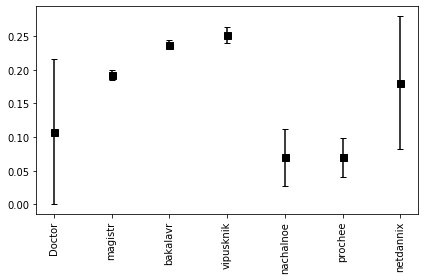

In [119]:
x_1 = np.arange(1, 8)
X_ticks=("Doctor", "magistr", "bakalavr", "vipusknik", "nachalnoe","prochee","netdannix")
y_1=[mean(conf_interval_doctor),mean(conf_interval_magistr),mean(conf_interval_bakalavr),mean(conf_interval_vipusknik),mean(conf_interval_nachalnoe),mean(conf_interval_prochee),mean(conf_interval_netdannix)]
y_err=[mean(conf_interval_doctor)-min(conf_interval_doctor),mean(conf_interval_magistr)-min(conf_interval_magistr),mean(conf_interval_bakalavr)-min(conf_interval_bakalavr),mean(conf_interval_vipusknik)-min(conf_interval_vipusknik),mean(conf_interval_nachalnoe)-min(conf_interval_nachalnoe),mean(conf_interval_prochee)-min(conf_interval_prochee),mean(conf_interval_netdannix)-min(conf_interval_netdannix)]
plt.errorbar(x=x_1, y=y_1, yerr=y_err, color="black", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black")
plt.xticks(x_1, X_ticks, rotation=90)

plt.tight_layout()
plt.show()

из графика видно, что доверительные интервалы некоторых категорий существенно далеко друг от друга, а значит есть категории людей с определенным образованием, которые с большей вероятностью вернут кредит, нежели люди с другим образованием. т.е. гипотеза о том, что образование не влияет на то, вернет ли человек долг отвеграется. Начальное образование (что весьма необычно) является лучшим индикатором того, что человек одаст долг. Выпускники не любят возвращать долги.
Можно использовать как один из показателей системы современного школьного образования.

чтобы оценить силу взаимосвязи между семейным положением и дефолтом нужно воспользоваться коэффициентом крамера

In [120]:
MARI_vernuli = scor[scor.default == 0].MARRIAGE.values
MARI_nevernuli = scor[scor.default == 1].MARRIAGE.values

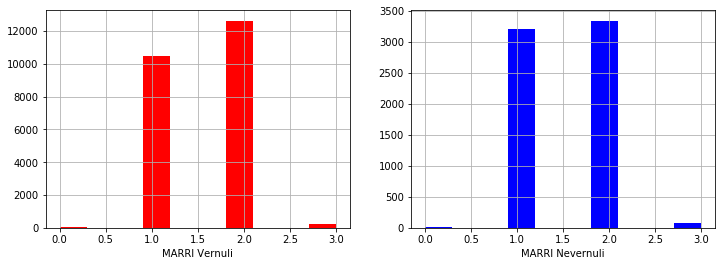

In [121]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(MARI_vernuli, color = 'r')
pylab.xlabel('MARRI Vernuli')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(MARI_nevernuli, color = 'b')
pylab.xlabel('MARRI Nevernuli')

pylab.show()

In [122]:
from scipy.stats import chi2_contingency

confusion_matrix=pd.crosstab(scor['MARRIAGE'], scor['default'])

def cramers_corrected_stat(confusion_matrix):

    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [123]:
print('коэффициент крамера: %f' %cramers_corrected_stat(confusion_matrix))

коэффициент крамера: 0.032997


видим, что коэффициент крамера достаточно мал по отношению к единице, а следовательно мы наблюдаем полное остутствие взаимосвязи между дефолтом и семейным положением

проверим гипотезы о возрасте: a) равенство медиан и b) равенство распределений между людьми вернувшими и невернувшими кредит

In [124]:
AGE_vernuli = scor[scor.default == 0].AGE.values
AGE_nevernuli = scor[scor.default == 1].AGE.values

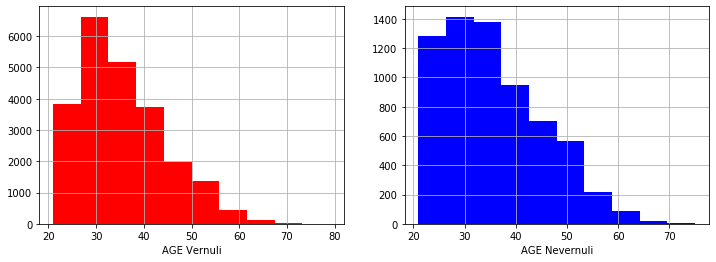

In [125]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(AGE_vernuli, color = 'r')
pylab.xlabel('AGE Vernuli')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(AGE_nevernuli, color = 'b')
pylab.xlabel('AGE Nevernuli')

pylab.show()

воспользуемся перестановочным критерием

In [126]:
def permutation_t_stat_ind(sample1, sample2):
    return np.median(sample1) - np.median(sample2)

In [127]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [128]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [np.median(joined_sample[list(i[0])]) - np.median(joined_sample[list(i[1])]) \
             for i in indices]
    return distr

In [129]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [130]:
print("p-value: %f" % permutation_test(AGE_vernuli, AGE_nevernuli, max_permutations = 100))

p-value: 1.000000


pvalue равен 1 а значит гипотеза о том, что медианы равны -верна

проверим вторую гипотезу с помощью манна-уитни

In [131]:
stats.mannwhitneyu(AGE_vernuli, AGE_nevernuli)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

pvalue=0.1862517717449308 больше 0.05, а значит шипотеза о том, что рапсределения равны - верна